In [44]:
import pandas as pd
import re, string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rating_df = pd.read_csv('data/rating_shortened.csv')
rating_df = rating_df[rating_df.rating!=-1]
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1741995 entries, 12 to 2084434
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 53.2 MB


In [3]:
genre_df = pd.read_csv('data/genre.csv')
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   genre_action         1000 non-null   float64
 1   genre_adventure      1000 non-null   float64
 2   genre_drama          1000 non-null   float64
 3   genre_fantasy        1000 non-null   float64
 4   genre_magic          1000 non-null   float64
 5   genre_military       1000 non-null   float64
 6   genre_shounen        1000 non-null   float64
 7   genre_sci-fi         1000 non-null   float64
 8   genre_thriller       1000 non-null   float64
 9   genre_space          1000 non-null   float64
 10  genre_life           1000 non-null   float64
 11  genre_romance        1000 non-null   float64
 12  genre_slice          1000 non-null   float64
 13  genre_supernatural   1000 non-null   float64
 14  genre_mecha          1000 non-null   float64
 15  genre_power          1000 non-null   fl

In [4]:
rating_df_animes=rating_df.anime_id.unique()
genre_df_animes=genre_df.anime_id.values
print(f'Number of unique animes in the genre dataset: {len(genre_df_animes)}')
print(f'Number of unique animes in the rating dataset: {len(rating_df_animes)}')
print(f'All animes in the rating set present in the genre set: {np.all([el in genre_df_animes for el in rating_df_animes])}')

Number of unique animes in the genre dataset: 1000
Number of unique animes in the rating dataset: 893
All animes in the rating set present in the genre set: True


### create user rating vectors

In [5]:
rating_df.user_id.nunique()

66974

In [6]:
rating_df.rating.unique()

array([10,  8,  9,  7,  6,  4,  1,  3,  5,  2], dtype=int64)

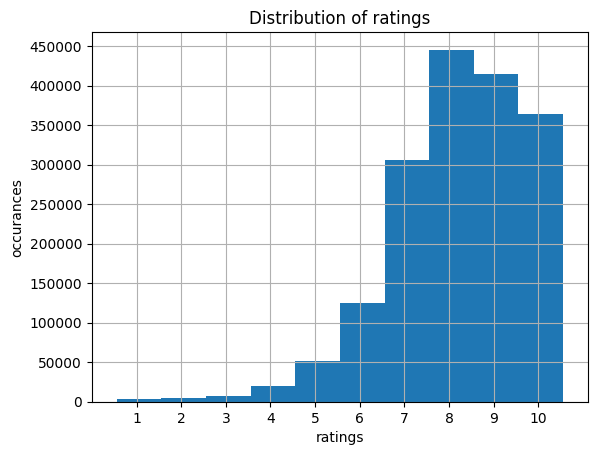

In [7]:
ax=plt.gca()
ax=rating_df.rating.hist()
ax.set_xlim(left=0.5, right=10.5)
ax.set_xticks(np.arange(1.4, 10, 0.9), range(1,11));
ax.set_yticks(range(0,500000,50000));
ax.set_xlabel('ratings')
ax.set_ylabel('occurances')
ax.set_title('Distribution of ratings');

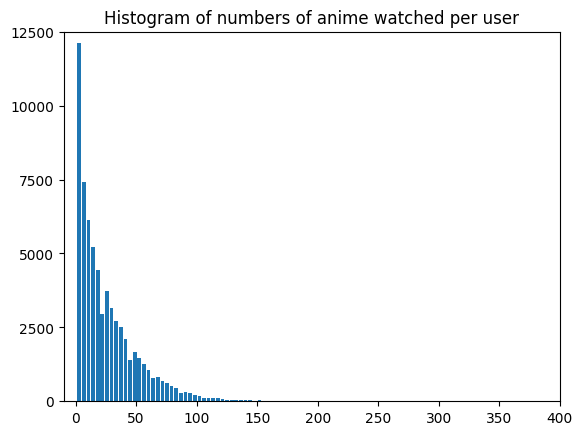

In [8]:
ax=plt.gca()
ax.hist(rating_df.groupby(by='user_id').anime_id.nunique().values, 
            bins=100, density=True, rwidth=0.8);
ax.set_ylim(bottom=0, top=0.05)
ax.set_yticks(ax.get_yticks(), [int(float(el.get_text())*250000) for el in ax.get_yticklabels()])
ax.set_xlim(left=-10, right=400)
ax.set_title('Histogram of numbers of anime watched per user');

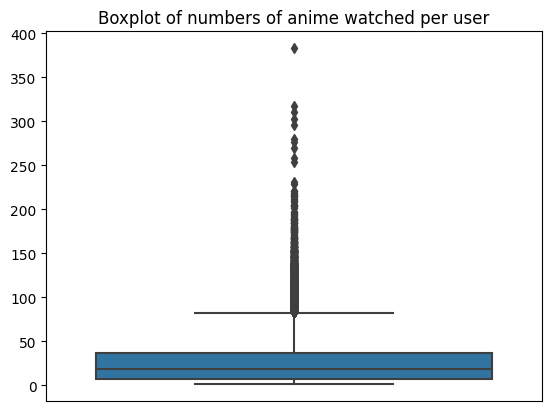

In [9]:
import seaborn as sns

ax = sns.boxplot(rating_df.groupby(by='user_id').anime_id.nunique().values)
ax.tick_params(bottom=False, labelbottom=False)
ax.set_title('Boxplot of numbers of anime watched per user');

In [10]:
def rating_transform(rating):
    if rating<4:
        return rating-4
    return rating-3

In [11]:
rating_df_transformed=rating_df.copy()
rating_df_transformed.rating=rating_df.rating.apply(rating_transform)
rating_df_transformed

,user_id,anime_id,rating
12,1,8074,7
20,1,11617,7
22,1,11757,7
41,2,11771,7
42,3,20,5
...,...,...,...
2084430,73515,12461,4
2084431,73515,13161,5
2084432,73515,14345,4
2084433,73515,22145,7


In [12]:
rating_df_transformed.rating.unique()

array([ 7,  5,  6,  4,  3,  1, -3, -1,  2, -2], dtype=int64)

In [13]:
user_rating_vectors_df = pd.pivot_table(data=rating_df_transformed, index='user_id', 
                                 columns='anime_id', values='rating', 
                                 fill_value=0)
user_rating_vectors_df

anime_id,1,6,20,30,43,44,46,59,64,71,...,33226,33232,33274,33366,33449,33474,33546,33606,33843,33871
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,5,3,-3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,7,0,0,0,4,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73513,6,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


### create anime genre matrix

In [14]:
anime_genre_matrix=genre_df[genre_df.anime_id.isin(rating_df_animes)].sort_values(by='anime_id').set_index('anime_id')
anime_genre_matrix

,genre_action,genre_adventure,genre_drama,genre_fantasy,genre_magic,genre_military,genre_shounen,genre_sci-fi,genre_thriller,genre_space,...,genre_shoujo,genre_demons,genre_dementia,genre_cars,genre_music,genre_ai,genre_kids,genre_hentai,genre_yaoi,genre_yuri
anime_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33474,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33546,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33606,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### create user profiles

In [15]:
user_profiles_df=pd.DataFrame(np.matmul(user_rating_vectors_df.values, 
                                        anime_genre_matrix.values))
user_profiles_df.columns=anime_genre_matrix.columns
user_profiles_df.index=user_rating_vectors_df.index
user_profiles_df

,genre_action,genre_adventure,genre_drama,genre_fantasy,genre_magic,genre_military,genre_shounen,genre_sci-fi,genre_thriller,genre_space,...,genre_shoujo,genre_demons,genre_dementia,genre_cars,genre_music,genre_ai,genre_kids,genre_hentai,genre_yaoi,genre_yuri
user_id,,,,,,,,,,,,,,,,,,,,,
1,14.0,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,134.0,99.0,54.0,107.0,22.0,11.0,84.0,23.0,12.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0
5,25.0,32.0,19.0,17.0,4.0,2.0,28.0,8.0,7.0,0.0,...,-2.0,3.0,-3.0,0.0,-3.0,0.0,6.0,0.0,0.0,0.0
7,130.0,65.0,48.0,80.0,31.0,21.0,80.0,89.0,22.0,0.0,...,0.0,11.0,7.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73511,10.0,10.0,0.0,10.0,10.0,0.0,0.0,13.0,0.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73512,10.0,11.0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
73513,27.0,36.0,26.0,28.0,4.0,3.0,0.0,20.0,0.0,6.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
user_profiles_df.to_csv("data/user_profiles_genres.csv", index=True)

### generate and save predictions

In [15]:
all_animes=set(genre_df.anime_id)

In [16]:
def generate_predictions(user_identifier, number=20):
    user_unwatched_animes = all_animes-set(rating_df[rating_df.user_id==user_identifier].anime_id)
    for_user_anime_genre_matrix = genre_df[genre_df.anime_id.isin(user_unwatched_animes)].set_index('anime_id')
    user_profile_vector = user_profiles_df.loc[user_identifier].values
    user_profile_vector = user_profile_vector.reshape((user_profile_vector.shape[0], 1))
    predictions = pd.Series(np.matmul(for_user_anime_genre_matrix.values, 
                                      user_profile_vector).reshape(-1))
    predictions.index = for_user_anime_genre_matrix.index
    threshold = predictions.sort_values(ascending=False).iloc[number]
    predictions = predictions[predictions>=threshold].sort_values(ascending=False)
    preds_df = pd.DataFrame(np.zeros(shape=(len(predictions),3)))
    preds_df.columns = ['user_id', 'anime_id', 'score']
    preds_df.user_id = np.tile(user_identifier, len(predictions))
    preds_df.anime_id = predictions.index
    preds_df.score = predictions.values
    return preds_df

In [17]:
all_preds=[]
for user_identifier in user_profiles_df.index:
    all_preds.append(generate_predictions(user_identifier))

In [18]:
user_profile_genres_predictions_df=pd.concat(all_preds, ignore_index=True)
user_profile_genres_predictions_df

,user_id,anime_id,score
0,1,1840,77.0
1,1,1195,77.0
2,1,30544,77.0
3,1,7430,63.0
4,1,2527,56.0
...,...,...,...
1646585,73516,3603,12.0
1646586,73516,10717,12.0
1646587,73516,31772,12.0
1646588,73516,11737,12.0


In [19]:
user_profile_genres_predictions_df.to_csv("data/user_profile_genres_predictions.csv", index=False)

### evaluate predictions

In [27]:
user_profile_genres_predictions_df=pd.read_csv("data/user_profile_genres_predictions.csv")

In [28]:
top_10_by_number_of_recommendations=user_profile_genres_predictions_df.groupby(by='anime_id').score.count().sort_values(ascending=False).iloc[:10].to_frame()
top_10_by_number_of_recommendations.columns=['number_of_recommendations']
top_10_by_number_of_recommendations

,number_of_recommendations
anime_id,
7430,52922
30544,50389
1517,49825
296,46692
451,45930
2527,42905
225,41604
22777,37458
1840,35448


In [29]:
anime_df = pd.read_csv('data/anime_shortened.csv')
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  1000 non-null   int64  
 1   name      1000 non-null   object 
 2   genre     1000 non-null   object 
 3   type      1000 non-null   object 
 4   episodes  1000 non-null   int64  
 5   rating    1000 non-null   float64
 6   members   1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [30]:
top_10_by_number_of_recommendations = pd.merge(left=top_10_by_number_of_recommendations, 
                                               left_on='anime_id',
                                               right=anime_df, 
                                               right_on='anime_id',
                                               how='left')
top_10_by_number_of_recommendations

,anime_id,number_of_recommendations,name,genre,type,episodes,rating,members
0,7430,52922,Konjiki no Gash Bell!!: Ougon no Chichi wo Mot...,"Action, Adventure, Comedy, Ecchi, Kids, Magic,...",OVA,1,6.63,1991
1,30544,50389,Gakusen Toshi Asterisk,"Action, Comedy, Ecchi, Fantasy, Harem, Romance...",TV,12,7.14,168657
2,1517,49825,Silent Mobius,"Action, Comedy, Drama, Fantasy, Horror, Magic,...",TV,26,6.95,7664
3,296,46692,Dragon Drive,"Action, Adventure, Comedy, Fantasy, School, Sc...",TV,38,6.88,14232
4,451,45930,InuYasha: Tenka Hadou no Ken,"Adventure, Comedy, Demons, Drama, Fantasy, His...",Movie,1,7.89,51079
5,2527,42905,Kotetsu no Daibouken,"Action, Comedy, Ecchi, Fantasy, Magic, Romance...",OVA,2,6.03,1420
6,225,41604,Dragon Ball GT,"Action, Adventure, Comedy, Fantasy, Magic, Sci...",TV,64,6.72,226625
7,22777,37458,Dragon Ball Kai (2014),"Action, Adventure, Comedy, Fantasy, Martial Ar...",TV,61,8.01,42666
8,1840,35448,Zero no Tsukaima: Futatsuki no Kishi,"Action, Adventure, Comedy, Ecchi, Fantasy, Har...",TV,12,7.73,235684
9,1132,34763,Digimon Frontier,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,50,7.25,74929


In [46]:
top_10_by_number_of_recommendations.drop(columns=['anime_id', 'genre', 'type', 'episodes', 'members'])

,number_of_recommendations,name,rating
0,52922,Konjiki no Gash Bell!!: Ougon no Chichi wo Mot...,6.63
1,50389,Gakusen Toshi Asterisk,7.14
2,49825,Silent Mobius,6.95
3,46692,Dragon Drive,6.88
4,45930,InuYasha: Tenka Hadou no Ken,7.89
5,42905,Kotetsu no Daibouken,6.03
6,41604,Dragon Ball GT,6.72
7,37458,Dragon Ball Kai (2014),8.01
8,35448,Zero no Tsukaima: Futatsuki no Kishi,7.73
9,34763,Digimon Frontier,7.25


In [31]:
score = np.dot(top_10_by_number_of_recommendations.number_of_recommendations, 
               top_10_by_number_of_recommendations.rating) 
score = score / np.sum(top_10_by_number_of_recommendations.number_of_recommendations)

In [32]:
print(f'Average weighted rating of the top 10 most frequently recommended animes: {score:.2f}')

Average weighted rating of the top 10 most frequently recommended animes: 7.09


In [33]:
top_10_by_sum_of_scores=user_profile_genres_predictions_df.groupby(by='anime_id').score.sum().sort_values(ascending=False).iloc[:10].to_frame()
top_10_by_sum_of_scores.columns=['sum_of_scores']
top_10_by_sum_of_scores

,sum_of_scores
anime_id,
7430,20219410.5
1517,19132357.5
30544,19104047.5
296,17840536.5
2527,17462845.5
451,16941529.0
225,14189376.0
22777,13822810.5
1924,13165799.0


In [34]:
top_10_by_sum_of_scores = pd.merge(left=top_10_by_sum_of_scores, 
                                        left_on='anime_id',
                                        right=anime_df, 
                                        right_on='anime_id',
                                        how='left')
top_10_by_sum_of_scores

,anime_id,sum_of_scores,name,genre,type,episodes,rating,members
0,7430,20219410.5,Konjiki no Gash Bell!!: Ougon no Chichi wo Mot...,"Action, Adventure, Comedy, Ecchi, Kids, Magic,...",OVA,1,6.63,1991
1,1517,19132357.5,Silent Mobius,"Action, Comedy, Drama, Fantasy, Horror, Magic,...",TV,26,6.95,7664
2,30544,19104047.5,Gakusen Toshi Asterisk,"Action, Comedy, Ecchi, Fantasy, Harem, Romance...",TV,12,7.14,168657
3,296,17840536.5,Dragon Drive,"Action, Adventure, Comedy, Fantasy, School, Sc...",TV,38,6.88,14232
4,2527,17462845.5,Kotetsu no Daibouken,"Action, Comedy, Ecchi, Fantasy, Magic, Romance...",OVA,2,6.03,1420
5,451,16941529.0,InuYasha: Tenka Hadou no Ken,"Adventure, Comedy, Demons, Drama, Fantasy, His...",Movie,1,7.89,51079
6,225,14189376.0,Dragon Ball GT,"Action, Adventure, Comedy, Fantasy, Magic, Sci...",TV,64,6.72,226625
7,22777,13822810.5,Dragon Ball Kai (2014),"Action, Adventure, Comedy, Fantasy, Martial Ar...",TV,61,8.01,42666
8,1924,13165799.0,Urusei Yatsura Movie 5: Final,"Action, Adventure, Comedy, Drama, Romance, Sci-Fi",Movie,1,7.72,2783
9,33606,12522940.5,One Piece Film: Gold Episode 0 - 711 ver.,"Action, Adventure, Comedy, Fantasy, Shounen, S...",Special,1,7.04,4166


In [45]:
top_10_by_sum_of_scores.drop(columns=['anime_id', 'genre', 'type', 'episodes', 'members'])

,sum_of_scores,name,rating
0,20219410.5,Konjiki no Gash Bell!!: Ougon no Chichi wo Mot...,6.63
1,19132357.5,Silent Mobius,6.95
2,19104047.5,Gakusen Toshi Asterisk,7.14
3,17840536.5,Dragon Drive,6.88
4,17462845.5,Kotetsu no Daibouken,6.03
5,16941529.0,InuYasha: Tenka Hadou no Ken,7.89
6,14189376.0,Dragon Ball GT,6.72
7,13822810.5,Dragon Ball Kai (2014),8.01
8,13165799.0,Urusei Yatsura Movie 5: Final,7.72
9,12522940.5,One Piece Film: Gold Episode 0 - 711 ver.,7.04


In [35]:
score = np.dot(top_10_by_sum_of_scores.sum_of_scores, 
               top_10_by_sum_of_scores.rating) 
score = score / np.sum(top_10_by_sum_of_scores.sum_of_scores)
print(f'Average weighted rating of the top 10 animes by sum of recommendation scores: {score:.2f}')

Average weighted rating of the top 10 animes by sum of recommendation scores: 7.06


In [38]:
user_profile_genres_predictions_df.anime_id.nunique()

1000

In [22]:
ratings=rating_df.groupby(by='anime_id').user_id.nunique().sort_values().iloc[-10:]
ratings.name='ratings'
ratings

anime_id
2904     21124
121      21332
5114     21494
20       22071
226      23528
6547     23565
1575     24125
16498    25289
11757    26309
1535     34226
Name: ratings, dtype: int64

In [24]:
top_10_most_rated_animes = pd.merge(left=ratings, 
                                    left_index=True,
                                    right=anime_df, 
                                    right_on='anime_id',
                                    how='left')
top_10_most_rated_animes.drop(columns=['anime_id', 'type', 'members', 'episodes'], inplace=True)
top_10_most_rated_animes

,ratings,name,genre,rating
4,21124,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",8.98
43,21332,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",8.33
0,21494,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",9.26
135,22071,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",7.81
122,23528,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",7.85
35,23565,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",8.39
6,24125,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",8.83
22,25289,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",8.54
128,26309,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",7.83
14,34226,Death Note,"Mystery, Police, Psychological, Supernatural, ...",8.71
